# Introduction to Inversion 

## RMS and Inverval velocity 

The RMS velocity is related to the interval velocity via 

$$V^2_{rms}(t_j) = \frac{1}{t_j} \int_0^{t_{max}} v^2_{int}(u) du$$

where 
- $v_{int}$ is the interval velocity 
- $V^2_{rms}$ is the RMS velocity 
- $H$ is the heavyside step function 
- $t$ is time

The analytic inverse is given by 

$$v_{int} = V_{rms}(t) \left(1 + \frac{2 t V'_{rms}(t)}{V_{rms}(t)}\right)^{1/2}$$

In order to work with these equations, we will pick a function for $v_{int}$ that we can integrate: 

$$v_{int} = v_0 + a \sin(2\pi f t)$$
$$\quad = v_0 + a \sin(\omega t)$$

## Goals
- figure out what $V_{rms}$ (can use sympy or Wolfram Alpha) 
- use finite differences to recover $v_{int}$ from $V_{rms}$ 
- explore principles of non-uniqueness for this problem 


## Imports 

In [1]:
!pip install sympy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## Define and plot the interval velocity

## Analytic solution for the RMS velocity 

In [3]:
from sympy import *
func, v0, v_int, a, omega, f, T, t = symbols('func, v0, v_int, a, omega, f, T, t')
func = integrate((v0 + a*sin(omega*t))**2, (t, 0, T))

In [4]:
func

Piecewise((T*a**2*sin(T*omega)**2/2 + T*a**2*cos(T*omega)**2/2 + T*v0**2 - a**2*sin(T*omega)*cos(T*omega)/(2*omega) - 2*a*v0*cos(T*omega)/omega + 2*a*v0/omega, (omega > -oo) & (omega < oo) & Ne(omega, 0)), (T*v0**2, True))

In [16]:
def compute_vrms(omega, v_0, a, t):

    v_rms = np.zeros_like(t)
    inds_non_zeros = t > 0.    
    v_rms[inds_non_zeros] = np.sqrt(
        (
         a**2 * t[inds_non_zeros] / 2
        +t[inds_non_zeros]*v_0**2        
        -a**2 * np.sin(omega * t[inds_non_zeros]) * np.cos(omega * t[inds_non_zeros]) / (2*omega)
        -2*a*v_0 * np.cos(omega*t[inds_non_zeros]) / (omega)
        +2*a*v_0 / omega 
        )
        /t[inds_non_zeros]
    )    
    v_rms[~inds_non_zeros] = v_0
    return v_rms

In [17]:
np.ones(1, dtype=bool).astype(float)

array([1.])

In [18]:
import numpy as np
f = 2.5
omega = 2 * np.pi * f
v_0 = 1500  # m/s
a = 0.2 * v_0
t = np.linspace(0, 1, 200)
v_int_script = v_0 + a * np.sin (omega * t)

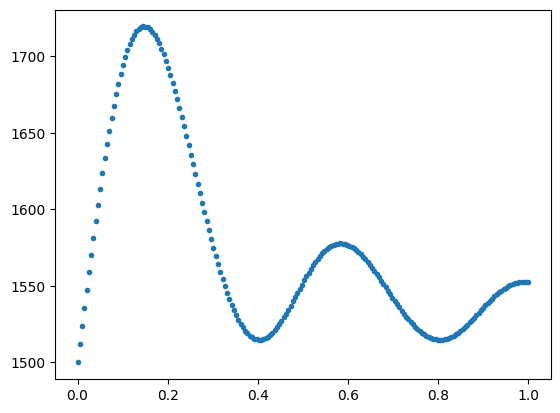

In [19]:
import matplotlib.pyplot as plt
# plt.plot(t, rms_velocity_analytic(t, v_0, a, omega))
plt.plot(t, compute_vrms(omega, v_0, a, t), '.')

In [20]:
def compute_interval_velocity(omega, v_0, a, t):
    """
    Compute the instantaneous velocity at time `t` for a system where velocity
    varies sinusoidally with time.

    The velocity is modeled as:
        v(t) = v_0 + a * sin(omega * t)

    Parameters
    ----------
    omega : float or array_like
        Angular frequency of the sinusoidal variation (in radians per second).
    v_0 : float
        Base or initial velocity (when the sine term is zero).
    a : float
        Amplitude of the sinusoidal velocity fluctuation.
    t : float or array_like
        Time value(s) at which to compute the velocity.

    Returns
    -------
    float or numpy.ndarray
        Computed velocity at time `t`. If `t` is an array, returns an array of
        the same shape.

    Examples
    --------
    >>> import numpy as np
    >>> compute_interval_velocity(omega=2*np.pi, v_0=3.0, a=1.0, t=0.25)
    4.0

    Notes
    -----
    This function assumes `numpy` is imported as `np`.
    """
    return v_0 + a * np.sin(omega * t)


In [21]:
v_int_func = compute_interval_velocity(omega, v_0, a, t)

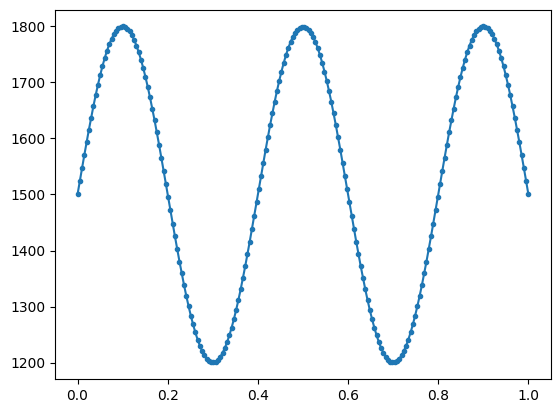

In [22]:
import matplotlib.pyplot as plt
plt.plot(t, v_int_func, '.-')
# plt.plot(t, v_int_func, '.')

In [23]:
v_rms = compute_vrms(omega, v_0, a, t)



$$ a \sin{\left(\omega u \right)} + v_{0}$$

## Estimate $v_{int}$

if we have VRMS but don't know the interval velocity, how do we estimate it? Use the formula for the analytic inverse

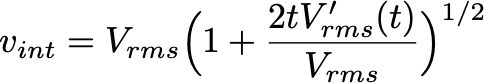

Things we need: 
- Vrms (we have this) 
- derivative of Vrms

In [39]:
dt = np.diff(t)
v_rms_prime = np.r_[0., np.diff(v_rms)/dt]
v_int_numeric = v_rms * np.sqrt(1 + 2*t*v_rms_prime / v_rms)

In [40]:
# a = np.ones(3)
# b = np.ones(3) * 2
# np.r_[a, b]

In [41]:
def compute_vint_from_vrms(t, vrms):
    dt = np.diff(t)
    v_rms_prime = np.diff(vrms)/dt
    v_rms_prime = np.r_[0, v_rms_prime]
    vint_rec = vrms * np.sqrt(np.abs(1 + 2*t*v_rms_prime/vrms))
    return vint_rec

In [54]:
from scipy.interpolate import interp1d

In [63]:
f_linear = interp1d(t[::nskip], v_rms[::nskip], fill_value='extrapolate', kind='quadratic')
v_rms_linear_int = f_linear(t)

In [70]:
noise = np.random.randn(len(t)) *  5

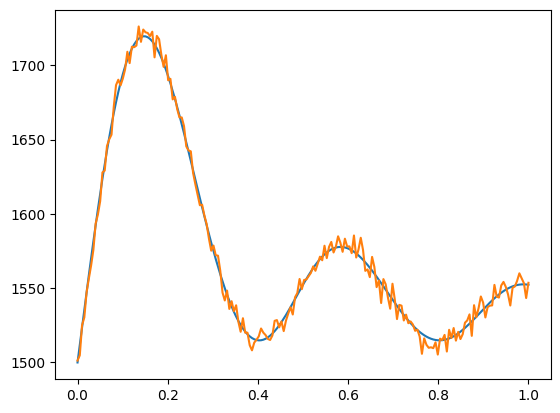

In [71]:
nskip=20
# plt.plot(t[::nskip], v_rms[::nskip], 'o-')
# plt.plot(t, v_rms_linear_int, '-')
plt.plot(t, v_rms, '-')
plt.plot(t, v_rms+noise, '-')

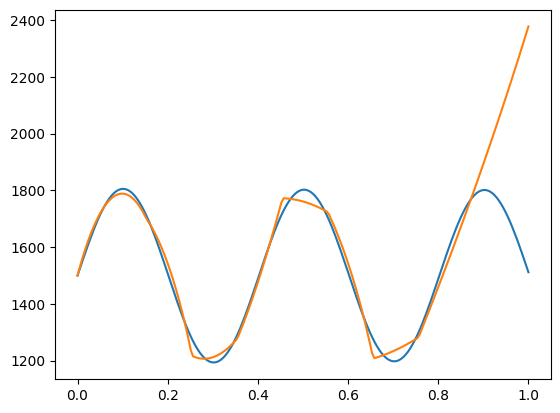

In [65]:
vint_rec_skip = compute_vint_from_vrms(t, v_rms_linear_int)
vint_rec = compute_vint_from_vrms(t, v_rms)

plt.plot(t, vint_rec)
plt.plot(t, vint_rec_skip)
# plt.plot(t[::nskip], v_rms[::nskip], '.-')


## Invert with a finite number of inacurate data